# Data Science Project - Bank Authentication Dataset
## Mohamed R Helayhel


In [1]:
#Import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import scipy.stats as stat
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## STEP 1 Formulate the Project Research Framework
##### The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

### Description
#### Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images: 'variance', 'skewness', 'curtosis' and 'entropy'.

### Questions to answer:
#### 1-Can we develop a model to accurately predict the authenticity of the banknotes based using the four attributes: 'Variance', 'skewness', 'curtosis' and 'entropy'? The authenticity is a categorical variable called 'class' (authenticity) of the banknotes. The Labels for 'class' are 0 as authentic banknote, 1 is counterfeit banknote.
#### 2- Which models perform the best in making the prediction out of kNN, Naive Bayes, and Logistic Regression? And Why?
#### 3- What are some steps we could implement to improve model performance? 


## Step 2 Data Science Analysis  
### 2.1 Descriptive Statistics
#### 2.1.1 Numerical Summaries

In [2]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
print(bankNoteAuth.shape)
print(bankNoteAuth.head())

(1371, 5)
   variance  skewness  curtosis  entropy  class
0   4.54590    8.1674   -2.4586 -1.46210      0
1   3.86600   -2.6383    1.9242  0.10645      0
2   3.45660    9.5228   -4.0112 -3.59440      0
3   0.32924   -4.4552    4.5718 -0.98880      0
4   4.36840    9.6718   -3.9606 -3.16250      0


In [3]:
# Print the summary of the data

print(bankNoteAuth.describe())
print(bankNoteAuth.describe().T)

          variance     skewness     curtosis      entropy        class
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
           count      mean       std      min      25%      50%      75%  \
variance  1371.0  0.431410  2.842494  -7.0421 -1.77470  0.49571  2.81465   
skewness  1371.0  1.917434  5.868359 -13.7731 -1.71130  2.31340  6.81310   
curtosis  1371.0  1.400694  4.310105  -5.2861 -1.55335  0.61663  3.18160   
entropy   1371.0 -1.192200  2.101683  -8.5482 -2.41700 -0

In [4]:
# Print the datatypes which are keys.
types = bankNoteAuth.dtypes
print(types)
print("Keys of bank Note Authentication dataset:\n", bankNoteAuth.keys())

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object
Keys of bank Note Authentication dataset:
 Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [5]:
# print the target variable
# Labels: 0 as authentic, 1 is counterfeit.
print("class:", bankNoteAuth['class'])

class: 0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64


### Comments: 
#### The data is composed of 4 predictor feature variables and 1 categorical variable which will serve as the output of the classification. We have 1371 observations, and 'curtosis' has the highest max at 17.9274 out of the predictor variables, while 'entropy' has the lowest max of 2.4495.

#### 2.1.2 Graphical Summaries

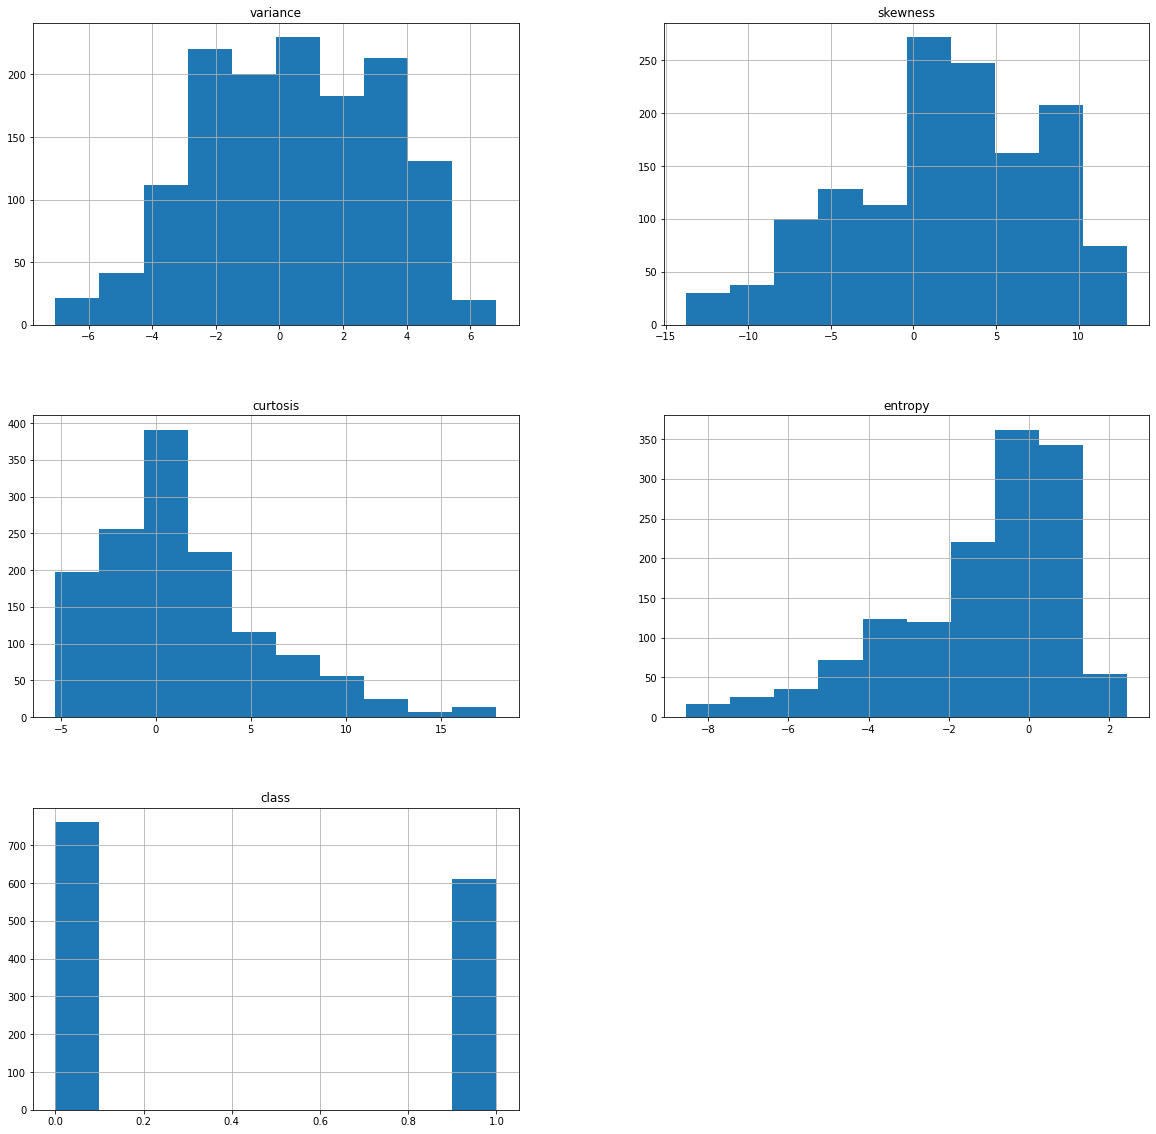

In [6]:
# Create the histogram of all the variables.

%matplotlib inline
bankNoteAuth.hist(figsize = (20,20))
plt.show()

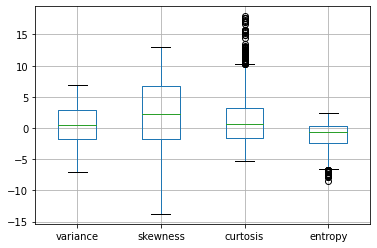

In [7]:
# create a grid of boxplot
%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]

boxplot = bankNoteAuth.boxplot(column=['variance', 'skewness', 'curtosis', 'entropy'])  


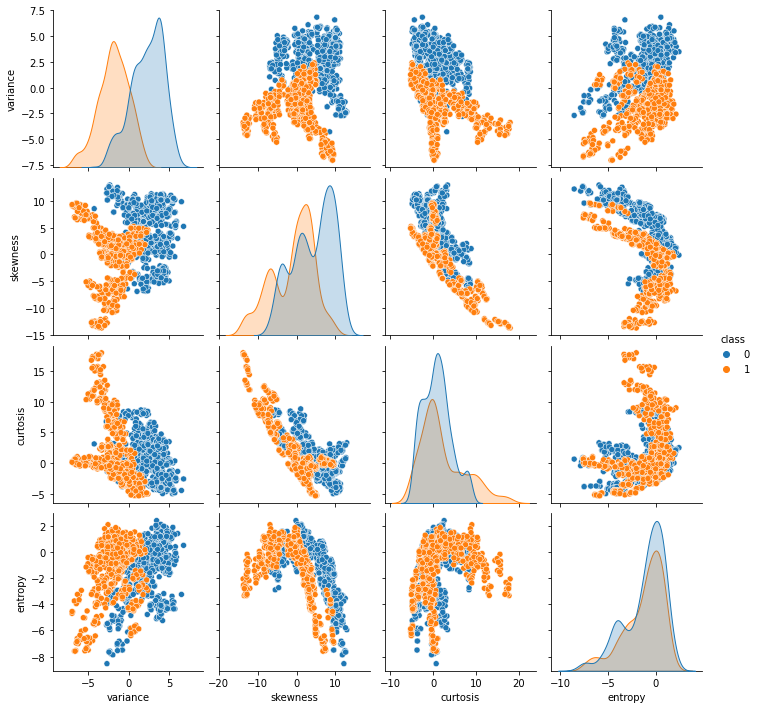

In [8]:
#Creating a pairplot differentiatied by Class

%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy','class']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'class')
plt.show() 

### 2.2 Correlation and Regression

<AxesSubplot:>

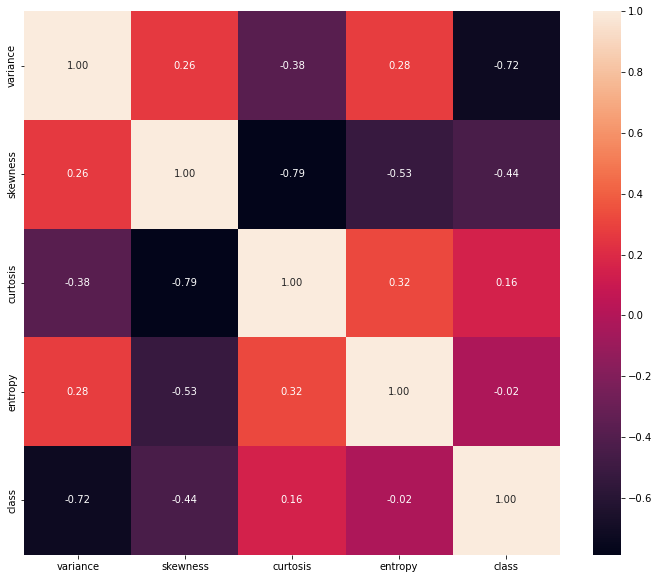

In [9]:
# Viewing Correlation coefficients using a heatmap
bankNoteAuth = pd.read_csv('data_banknote_authentication.txt')
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
plt.figure(figsize=(12,10))
sns.heatmap(bankNoteAuth.corr(),annot=True,fmt='.2f')

[1.41859662]
[[-3.34175045]]


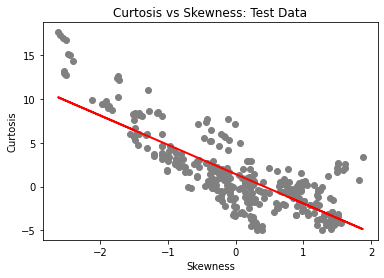

      Actual  Predicted
0   -0.79287  -1.239099
1   -2.05670  -2.245320
2    1.34580   1.244151
3    3.43990   5.462128
4   -2.99150  -2.439490
..       ...        ...
338  0.29018  -1.976987
339 -0.38758  -2.654873
340  3.65580   5.074927
341  2.10920  -3.990682
342  5.59920   6.445998

[343 rows x 2 columns]
Mean Squared Error: 6.768369685673958
Root Mean Squared Error: 2.6016090570402692
R^2: 0.6475742988944851


In [10]:
# Reshape the data using array.reshape(1, -1) if it contains a single sample with 1 column but unknown rows so use all rows.

skewness_reshape = bankNoteAuth['skewness'].values.reshape(-1,1) 
curtosis_reshape= bankNoteAuth['curtosis'].values.reshape(-1,1)

#Regression
X_train, X_test, y_train, y_test = train_test_split(skewness_reshape, curtosis_reshape, test_size=0.25, random_state=7)
regressor = LinearRegression()  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
#Training the Regression algorithm
regressor.fit(X_train, y_train) 
 # Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# Create scatter plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.ylabel('Curtosis')
plt.xlabel('Skewness')
plt.title("Curtosis vs Skewness: Test Data")
plt.show()

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Mean Squared Errror and Root Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

## Comments
#### Looking at the historgram of all the variables. We see that the 'variance' has a normal distrubition while 'skewness' has a slight negative skew. The other two predictor variables have stronger skews, where entropy has a heavy negative skew and curtosis has a heavy positive skew. Looking at the boxplot, we see that 'curtosis' has the highest number of outliers followed by 'entropy', which are high leverage points and might negatively impact the accuracy of the prediction using those two feature variables.

#### Additionally, the 'class' variable to be predicted is balanced across the two labels 0 and 1, which has direct implications on the metrics that can be used for model assessment. For example, the use of the accuracy metric is valid for this application due to this balanced output variable.

#### In the pairplots above, we see a distinct differentation between the classes. This is especially obvious for the 'skewness' and 'variance' plotted together, where we see a clear boundary between the fake and authentic banknotes based on those two input parameters.

#### We see from the correlation matrix that two of the predictor variables 'skewness' and 'curtosis' are highly correlated. To study this correlation, the simple linear regression model was built and shows the inverse correlation in the graph. It has an R^2 of ~65% which means that 65% of the variation in 'curtosis' can be explained by 'skewness', which goes against regression's assumption that the predictor variables are independent. This multicollinearity is expected to cause less reliable statistical inferences about the regression models' coefficients and potentially reduce the accuracy of the model.

### 2.3 Inferential Statistics

In [11]:
#Independent t-test
indepTtestVarSkew=stat.ttest_ind(bankNoteAuth[['variance']],bankNoteAuth[['skewness']])
indepTtestVarCurt=stat.ttest_ind(bankNoteAuth[['variance']],bankNoteAuth[['curtosis']])
indepTtestVarEntr=stat.ttest_ind(bankNoteAuth[['variance']],bankNoteAuth[['entropy']])
print('Indep T-Test "variance" and "Skewness" ',indepTtestVarSkew)
print('Indep T-Test "variance" and "Entropy" ',indepTtestVarEntr)
indepTtestSkewCurt=stat.ttest_ind(bankNoteAuth[['skewness']],bankNoteAuth[['curtosis']])
indepTtestSkewEntr=stat.ttest_ind(bankNoteAuth[['skewness']],bankNoteAuth[['entropy']])
print('Indep T-Test "Skewness" and "Curtosis" ',indepTtestSkewCurt)

#Paired t-test

CounterfeitGroup = bankNoteAuth[bankNoteAuth['class']==1]
AuthenticGroup = bankNoteAuth[bankNoteAuth['class']!=1]
trimAuthenticGrp=AuthenticGroup[:610]
pairedTtestVar=stat.ttest_rel(CounterfeitGroup[['variance']],trimAuthenticGrp[['variance']])
pairedTtestEntr=stat.ttest_rel(CounterfeitGroup[['entropy']],trimAuthenticGrp[['entropy']])
print('Pair T-Test:"varnce cntrft"&"varnce auth"',pairedTtestVar)
print('Pair T-Test: "Entrpy cntrft" and "Entrpy auth" ',pairedTtestEntr)


Indep T-Test "variance" and "Skewness"  Ttest_indResult(statistic=array([-8.43842179]), pvalue=array([5.13362259e-17]))
Indep T-Test "variance" and "Entropy"  Ttest_indResult(statistic=array([17.00591992]), pvalue=array([9.77970055e-62]))
Indep T-Test "Skewness" and "Curtosis"  Ttest_indResult(statistic=array([2.62780419]), pvalue=array([0.00864173]))
Pair T-Test:"varnce cntrft"&"varnce auth" Ttest_relResult(statistic=array([-36.34222079]), pvalue=array([1.17999821e-154]))
Pair T-Test: "Entrpy cntrft" and "Entrpy auth"  Ttest_relResult(statistic=array([-0.03813666]), pvalue=array([0.96959122]))


## Comments
### Independent T-Tests
#### We see that the two different populations 'variance' and 'skewness' have a p value clsoe to 0 which means that the there is a significant difference between their means and we can confidently reject the null hypothesis. 'variance' and 'entropy' also has a p-value close to 0, so we can draw the same conclusion
#### Now as we know from the correlation matrix above, 'skewness' and 'curtosis' have what is considered a strong inverse correlation of -0.79. And the simple linear regression model has an R^2 of 65%. So, we notice that the p-value drops to ~0.009 which still leads to the rejection of H0, but is a lesser value than what we observed above for the first 2 t-tests.
### Paired T-Tests
#### To perform paired T-tests, we focus at the our predictor variable samples after splitting them based on the output variable result (obvservations with counterfeit alone, and obvservations with authentic alone). 
#### Looking at the class-differentiated pairplot results above, we see a clear distinction between the means of the two 'variance' samples. The results are confirmed by the paired T-tests, since the p_value is close to zero, and we can reject the null H0.
#### Now, relying on the same pairplot, we see that for 'entropy', the class differentiation barely created any separation based on class. Therefore, we see a very high p-value of 0.9696 that confirms that we should accept the null hypothesis which means that the means are actually not different and any observed differentiation is statistically insignificant.
#### Conclusion: Inferential statistics validates the patterns observed in the descriptive analysis.

## 2.4 Data Science Algorithms

#### 2.4.1 Logistic Regression Classification

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X = bankNoteAuth[['variance', 'skewness', 'curtosis','entropy']] 
y = bankNoteAuth[['class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  
# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

Best: 0.989949 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.989949 (0.007326) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.989949 (0.007326) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989949 (0.007326) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.989625 (0.008317) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.989625 (0.008317) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.988318 (0.008123) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.981506 (0.011062) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981506 (0.011062) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.981182 (0.011772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.974700 (0.012961) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.974700 (0.012961) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.975671 (0.013241) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.937750 (0.024436) wit

In [13]:
train_scores=model.score(X_train,y_train)
test_scores=model.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')
## Error Rate
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction=prediction.reshape(343,1)
errorLogRegFirst=np.mean(prediction!=y_test)
print('Log Reg Error%',errorLogRegFirst*100)

The train score is: 99.0272373540856 %
The test score is: 98.83381924198251 %
Log Reg Error% class    1.166181
dtype: float64


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=7, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, y_test, y_pred, cv=fold)
print(100*results.mean())

98.83193277310924


## Comments:
#### Logistic regression works well in predicting whether the bank notes are fake or authentic, with a test accuracy of 98.83 % for a 75-25 Test-Train Split. The Train score, CV score, and Test Score are all close which confirms that our model is not overfitting to training data, or is impacted by flawed sampling for train and test data. 
#### This model utilizes 3 different solvers with a L2 regularization for different C (inverse of Lambda). We notice that the less reguralization the better the model performs in this case (highest C=Least penalty). The L2 regularization (similar optimization approach to Ridge Regression) reduces coefficients to eliminate overfitting and given that our model had some correlation among some of its predictor variables, L2 is a good regularization technique. 

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

Best: 0.988651 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.988651 (0.009070) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.988651 (0.009070) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.985085 (0.011961) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.977299 (0.014697) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.862529 (0.031742) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
[0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 1 0

## Comments: 
#### This model utilizes liblinear solvers with a L1 regularization for different C (inverse of Lambda). We see a similar test accuracy as the model implemented above with L2 regularization. We also notice that the less reguralization the better the model performs in this case (highest C=Least penalty). The L1 regularization (similar optimization approach to Lasso Regression) can set the less prominent coefficients to zero, and we see at C=0.01 the test accuracy drops from 97.73% for C=0.1 to 86.25% which means that it was heavily penalizing the model and lead to underfitting by raising the bias too high. For comparison, the L2 Model has an accuracy of 93.35% for C=0.01 which shows that the L2 optimization for this model adds less bias vs L1.

In [16]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = bankNoteAuth.iloc[:,0:4]  #independent columns
y = bankNoteAuth.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif,k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print best features

      Specs        Score
0  variance  1513.864896
1  skewness   336.676646
2  curtosis    33.854046
3   entropy     0.737256


In [17]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Class=bankNoteAuth.iloc[:,-1];

print(Class)
print(bankNoteAuth[['variance']])
model = sm.GLM.from_formula('Class ~ variance + skewness + curtosis + entropy', family=sm.families.Binomial(), data=bankNoteAuth)
result = model.fit()
result.summary() 

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64
      variance
0      4.54590
1      3.86600
2      3.45660
3      0.32924
4      4.36840
...        ...
1366   0.40614
1367  -1.38870
1368  -3.75030
1369  -3.56370
1370  -2.54190

[1371 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 1371
Model:                            GLM   Df Residuals:                     1366
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.945
Date:                Tue, 29 Mar 2022   Deviance:                       49.891
Time:                        15:58:22   Pearson chi2:                     53.5
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3218      1.559      4.697      0.000       4.266      10.377
variance      -7.8593      1.738     -4.521      0.000     -11.267      -4.452
skewness      -4.1910      0.904     -4.635      0.000      -5.963      -2.419
curtosis      -5.2874      1.161     -4.553      0.000      -7.563      -3.011
entropy       -0.6053      0.331     -1.830      0.067      -1.254       0.043
==============================================================================
"""

In [18]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = bankNoteAuth[['variance','skewness','curtosis']] 
y = bankNoteAuth[['class']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  
# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# define models and parameters
model = LogisticRegression()
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)


# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

      variance  skewness  curtosis
0      4.54590   8.16740   -2.4586
1      3.86600  -2.63830    1.9242
2      3.45660   9.52280   -4.0112
3      0.32924  -4.45520    4.5718
4      4.36840   9.67180   -3.9606
...        ...       ...       ...
1366   0.40614   1.34920   -1.4501
1367  -1.38870  -4.87730    6.4774
1368  -3.75030 -13.45860   17.5932
1369  -3.56370  -8.38270   12.3930
1370  -2.54190  -0.65804    2.6842

[1371 rows x 3 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1366      1
1367      1
1368      1
1369      1
1370      1

[1371 rows x 1 columns]
Best: 0.989301 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       199
           1       0.97      1.00      0.99       144

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.9

## Comments:
#### We use SelectKbest for feature selection and notice that the highest score is given to 'variance' which we expect based on the correlation matrix showing the highest corr value vs the output predictor compared to other predictors. We also see that 'entropy' has a score that is close to 0 (2000x less in magnitude compared to 'variance') which indicates that it is the least important predictor.
#### To confirm this, we build a GLM logistic regression model using StatsModel and also see that the p-value for 'entropy' is 0.067 which is higher than alpha=0.05 generally used to accept or reject H0. In this case, 'entropy' is the only one showing non-signifance, so we eliminated it from the model and did not see any impact on the test accuracy, which remained around 98.83% signifying that we can confidently remove it for Logistic Regression model for this dataset. 

In [19]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
Q1 = bankNoteAuth['curtosis'].quantile(0.25)
Q3 = bankNoteAuth['curtosis'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

df = bankNoteAuth[~((bankNoteAuth['curtosis'] < (Q1 - 1.5 * IQR)) |(bankNoteAuth['curtosis'] > (Q3 + 1.5 * IQR)))]
print(df)
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = df[['variance','skewness','curtosis']] 
y = df[['class']]

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  
# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# define models and parameters
model = LogisticRegression()
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

model=LogisticRegression(**grid_result.best_params_)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)


      variance  skewness  curtosis  entropy  class
0      4.54590   8.16740  -2.45860 -1.46210      0
1      3.86600  -2.63830   1.92420  0.10645      0
2      3.45660   9.52280  -4.01120 -3.59440      0
3      0.32924  -4.45520   4.57180 -0.98880      0
4      4.36840   9.67180  -3.96060 -3.16250      0
...        ...       ...       ...      ...    ...
1362  -1.16670  -1.42370   2.92410  0.66119      1
1365  -2.41000   3.74330  -0.40215 -1.29530      1
1366   0.40614   1.34920  -1.45010 -0.55949      1
1367  -1.38870  -4.87730   6.47740  0.34179      1
1370  -2.54190  -0.65804   2.68420  1.19520      1

[1311 rows x 5 columns]
Best: 0.992878 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       0.99      1.00      1.00       127

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1

In [20]:
train_scores=model.score(X_train,y_train)
test_scores=model.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')
## Error Rate
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction=prediction.reshape(328,1)
errorLogRegBest=np.mean(prediction!=y_test)
print('Log Reg Error%',errorLogRegBest*100)

The train score is: 99.49135300101729 %
The test score is: 99.6951219512195 %
Log Reg Error% class    0.304878
dtype: float64


## Comments:
#### Next, we focus on eliminating the outliers for 'curtosis' which has several based on the histogram plotted above. The elimination of the outliers reduces our total rows (observations) from 1371 to 1311, which means that the 'curtosis' had 60 outlier values out of 1371 total. Now, we notice that the model's training accuracy jumps to 99.70% for the same Train-Test Split % and seed, signifying that the elimination of outliers was the most significant improvement peformed for our model and raised our accuracy by ~0.86% to an already high accuracy model.

#### 2.4.1.2 Naive Bayes Classification

X_train shape: (1028, 4)
y_train shape: (1028, 1)
X_test shape: (343, 4)
y_test shape: (343, 1)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       199
           1       0.81      0.83      0.82       144

    accuracy                           0.85       343
   macro avg       0.84      0.85      0.84       343
weighted avg       0.85      0.85      0.85       343

84.8396501457726


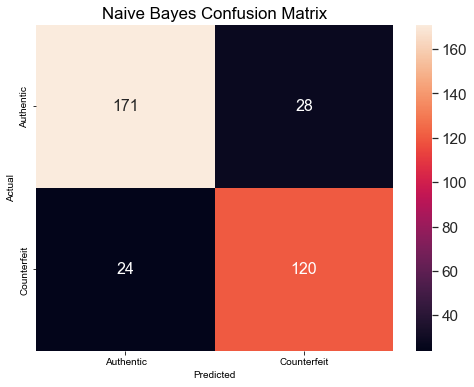

In [21]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels
# Divide data into predictor features vector and the label of the target variable 'Risk'

X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

# We check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)

print(accuracy*100)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 16},xticklabels=["Authentic","Counterfeit"], yticklabels=["Authentic","Counterfeit"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, y_test, y_pred, cv=fold)
print(100*results.mean())

84.89075630252101


In [23]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

train_scores=classifier.score(X_train,y_train)
test_scores=classifier.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')
## Error Rate
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
prediction=prediction.reshape(343,1)
errorNaiveBayesFirst=np.mean(prediction!=y_test)
print('NaiveBayesError%',errorNaiveBayesFirst*100)

The train score is: 84.3385214007782 %
The test score is: 84.8396501457726 %
NaiveBayesError% class    15.16035
dtype: float64


## Comments:
#### The first Naive Bayes Model's accuracy is much lower than all the Logistic Regression models above. Some of the things that contributed to this are:
#### Firstly, the boundary we see in the pairplot of 'variance' and 'skewness' is not linear and Naïve Bayes’ creates linear, elliptical, and parabolic boundaries, and the separation in this case has an irregular shape.
#### Secondly, only one the predictive feature variables has a normal distribution ('variance'), while the others have skews and two of the variables have several outliers ('curtosis' and 'entropy') so this has an impact on the predictive ability of Naive bayes for this dataset, since it is a generative model.
#### Thirdly, The predictive variables do not have categorical data, which is one of the things that Naive bayes that is best at dealing with. While Naive Bayes automatically, creates its own categories for numeric features, it does not function at it is best when it is all numeric like this case.
#### Finally, Looking at the correlation matrix, we see that 'curtosis' and 'skewness' have a very strong inverse correlation and a moderate inverse correlation between 'entropy' and 'skewness' which leads to degradation of the Naive Bayes algorithm's performance given its assumption of idenpendance among feature variables. 

[0.50234497 0.29166282 0.14585975 0.06013245]


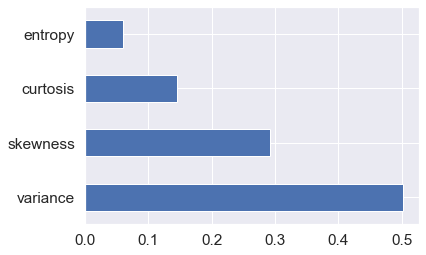

In [24]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

      variance  skewness
0      4.54590   8.16740
1      3.86600  -2.63830
2      3.45660   9.52280
3      0.32924  -4.45520
4      4.36840   9.67180
...        ...       ...
1366   0.40614   1.34920
1367  -1.38870  -4.87730
1368  -3.75030 -13.45860
1369  -3.56370  -8.38270
1370  -2.54190  -0.65804

[1371 rows x 2 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1366      1
1367      1
1368      1
1369      1
1370      1

[1371 rows x 1 columns]
[[179  20]
 [ 22 122]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       199
           1       0.86      0.85      0.85       144

    accuracy                           0.88       343
   macro avg       0.87      0.87      0.87       343
weighted avg       0.88      0.88      0.88       343

87.75510204081633


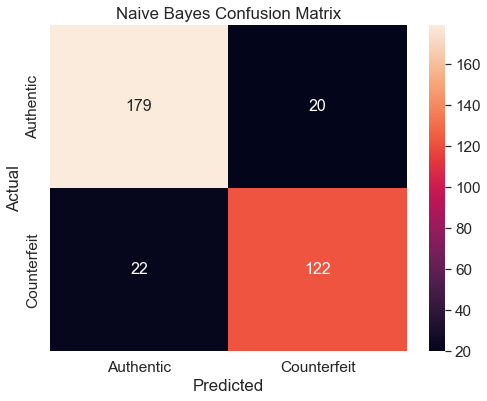

In [25]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = bankNoteAuth[['variance','skewness']] 
y = bankNoteAuth[['class']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

# We can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 16},xticklabels=["Authentic","Counterfeit"], yticklabels=["Authentic","Counterfeit"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

## Comments
#### After implementing Extra Trees Classification, in addition to the methods implemented above and the correlation between 'skewness' and 'curtosis' and 'skewness' and 'entropy', we decide to ommit the two least impactful predictor variables and notice an uptick in testing accuracy from 84.84% to 87.76% which shows that the Naive Bayes model can be efficient in its prediction while also increasing accuracy vs using all four predictor features.

(1371, 5)
(1311, 5)
      variance  skewness  curtosis
0      4.54590   8.16740  -2.45860
1      3.86600  -2.63830   1.92420
2      3.45660   9.52280  -4.01120
3      0.32924  -4.45520   4.57180
4      4.36840   9.67180  -3.96060
...        ...       ...       ...
1362  -1.16670  -1.42370   2.92410
1365  -2.41000   3.74330  -0.40215
1366   0.40614   1.34920  -1.45010
1367  -1.38870  -4.87730   6.47740
1370  -2.54190  -0.65804   2.68420

[1311 rows x 3 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
1362      1
1365      1
1366      1
1367      1
1370      1

[1311 rows x 1 columns]
[[182  19]
 [ 18 109]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       201
           1       0.85      0.86      0.85       127

    accuracy                           0.89       328
   macro avg       0.88      0.88      0.88       328
weighted avg       0.89      0.89      0.89       328

88.7195121951219

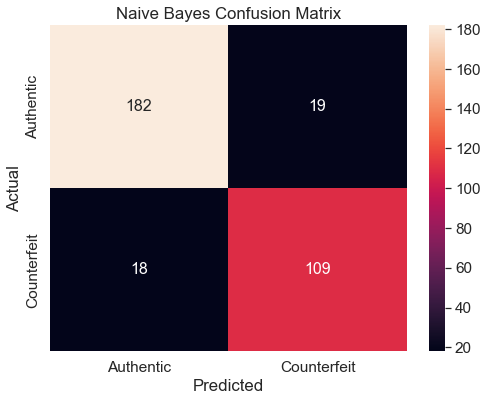

In [26]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
print(bankNoteAuth.shape)
Q1 = bankNoteAuth['curtosis'].quantile(0.25)
Q3 = bankNoteAuth['curtosis'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

df = bankNoteAuth[~((bankNoteAuth['curtosis'] < (Q1 - 1.5 * IQR)) |(bankNoteAuth['curtosis'] > (Q3 + 1.5 * IQR)))]
print(df.shape)
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'class'
X = df[['variance','skewness','curtosis']] 
y = df[['class']]
print(X)
print(y)
# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

# We can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 16},xticklabels=["Authentic","Counterfeit"], yticklabels=["Authentic","Counterfeit"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

train_scores=classifier.score(X_train,y_train)
test_scores=classifier.score(X_test,y_test)

print('The train score is:',train_scores*100,'%')
print('The test score is:',test_scores*100,'%')
## Error Rate
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
prediction=prediction.reshape(328,1)
errorNaiveBayesBest=np.mean(prediction!=y_test)
print('NaiveBayesError%',errorNaiveBayesBest*100)

The train score is: 86.77517802644964 %
The test score is: 88.71951219512195 %
NaiveBayesError% class    11.280488
dtype: float64


## Comments:
#### Finally, since 'curtosis' was the third best feature variable, and we noticed that outlier elimination helped the performance in Logistic Regression models, we return 'curtosis' to the mode after eliminating its outliers and see the test accuracy jump to its best at 88.72%. This expected since 'curtosis'  had strongly skewed distributions and high outlier presence, which also hurts the performance of the Naive Bayes Algorithm.

#### 2.4.1.3 kNN Classification

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Risk'

X = bankNoteAuth[['variance', 'skewness', 'curtosis','entropy']] 
y = bankNoteAuth[['class']]

# Check if null values in the columns
X.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [29]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1028, 4)
y_train shape: (1028, 1)
X_test shape: (343, 4)
y_test shape: (343, 1)


[[198   1]
 [  0 144]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.99      1.00      1.00       144

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

99.70845481049562


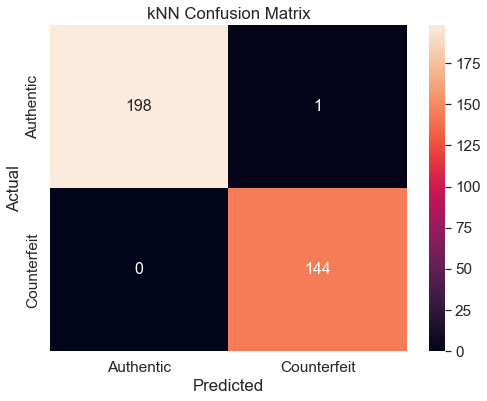

In [38]:
from sklearn.metrics import accuracy_score

# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting 
#the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens 
# the numpy.ndarray.

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"size": 16},xticklabels=["Authentic","Counterfeit"], yticklabels=["Authentic","Counterfeit"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("kNN Confusion Matrix")
plt.show()

## Comments
#### kNN has the highest test accuracy of 99.7% for this split, and this was expected for several reasons:
#### 1- In the pairplot above , it is noteworthy that the bounday based on class separation for 'variance' and 'skewness' is distinct but not linear, which makes the kNN algorithm a good candidate to predict and classify the test data. Given that, getting a high testing accuracy with a 75-25 split between the train and test data respectively is expected. 
#### 2- Furthermore, kNN is non-parametric so the skewed distributions and presence of outliers do not have an impact on the performance of the model, as we saw with Naive Bayes above.

[0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9970845481049563, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9941690962099126, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9941690962099126, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688, 0.9912536443148688]
For a K range of 40, The maximum Testing Accuracy is at achieved at a rate of 99.70845481049562 % when K is equal to  1


Text(0, 0.5, 'Testing Accuracy')

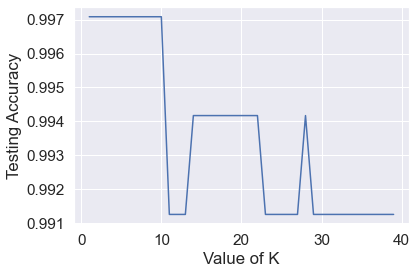

In [31]:
k_range = range(1, 40)

# Creating a Python list by [] and then appending the accuracy scores

scores = []
knnScores=[]
#  looping through the k range 1 to 40

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    # appending the accuracy scores in the dictionary named scores.
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
highScore=max(scores)
max_index = scores.index(highScore)

print('For a K range of 40, The maximum Testing Accuracy is at achieved at a rate of', 100*max(scores),'% when K is equal to ', max_index+1)
# Printing the K number of neighbors and Testing Accuracy.
import matplotlib.pyplot as plt

# This command allow plots to appear within the notebook
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

In [32]:
# Optimizing the k-nn by using Cross validation

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

#train model with cv of 10
cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
print(np.mean(cv_scores))

0.9985401459854014


## Comments
#### Changing the k value has an impact on the accuracy of the model. We choose a K range of  1 through 40 to iterate through and observe the accuracy rates for this range. We see that the highest test accuracy is achieved from the start through K=10, and it drops ~0.01% point around K= 11 but it maintains a fluctuating accuracy curve up until K approaches 30. From that point and onwards, the model testing accuracy flattens at the lowest value seen on this curve, which seems to show that the a larger K value might lead to slightly underfitting data.

#### The 10 fold cross validation scores are close to the testing accuracy scores, which gives us confidence that the model above is not overfitting and underfitting to a specific split of the data.

Max train score 100.0 % and k = [1, 2]
Max test score 99.70845481049562 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


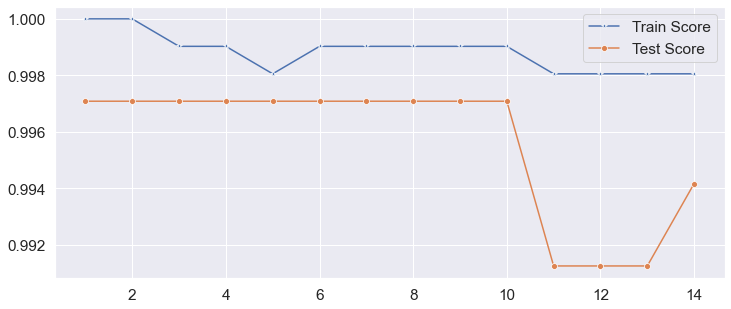

In [33]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)

# # Store the max train test score index by enumerating through all the scores.

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Store the max score in the first curly parenthesis and the indices in the second.
# The lambda function takes the index starting at zero therefore one is added to get the k value.

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation by comparative graph.
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0, 0.5, 'Mean Error')

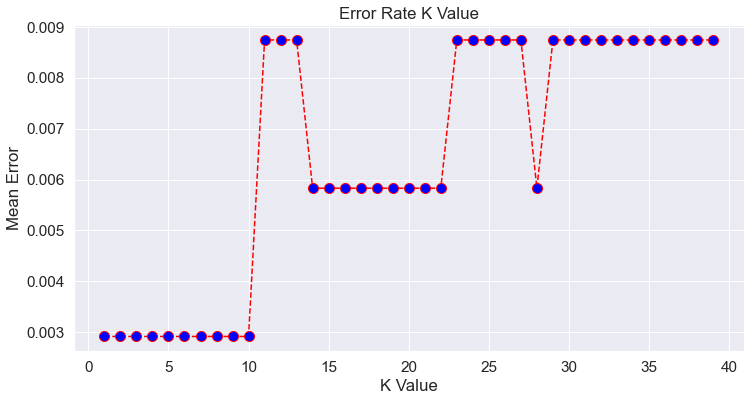

In [34]:
## Error Rate Graph
# Create an empty dictionary to collect errors across the different k-values
error = []

# Iterate throught k=1 to 40  and run the classifier.Predict and append the error for each iteration.
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i=pred_i.reshape(343,1)
    error.append(np.mean(pred_i != y_test))

    # Create a plot of Mean error versus kvalue.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

X_train shape: (1028, 3)
y_train shape: (1028, 1)
X_test shape: (343, 3)
y_test shape: (343, 1)
Max train score 100.0 % and k = [1, 2]
Max test score 100.0 % and k = [1, 2, 3, 4]


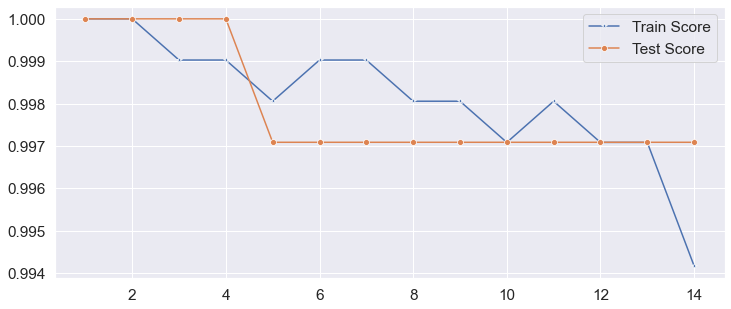

In [35]:
X = bankNoteAuth[['variance', 'skewness', 'curtosis']] 
y = bankNoteAuth[['class']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)

# # Store the max train test score index by enumerating through all the scores.

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Store the max score in the first curly parenthesis and the indices in the second.
# The lambda function takes the index starting at zero therefore one is added to get the k value.

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation by comparative graph.
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0, 0.5, 'Mean Error')

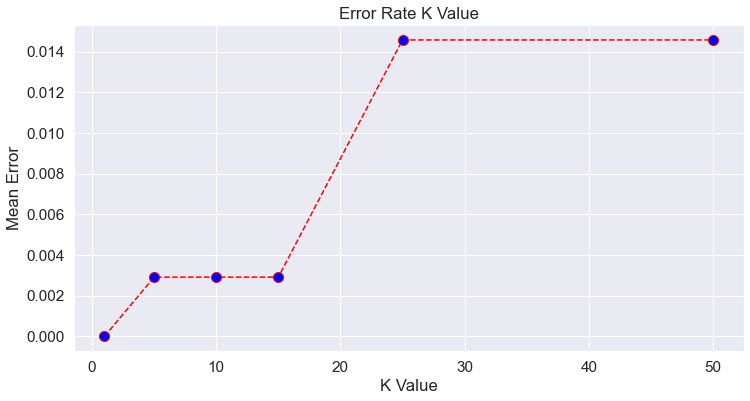

In [36]:
## Error Rate Graph
# Create an empty dictionary to collect errors across the different k-values
errorKNN = []
kneighbors=[1,5,10,15,25,50]

for i in kneighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i=pred_i.reshape(343,1)
    errorKNN.append(np.mean(pred_i != y_test))

    # Create a plot of Mean error versus kvalue.
plt.figure(figsize=(12, 6))
plt.plot(kneighbors, errorKNN, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Comments:
#### Based on the feature selection methods implemented in the code above by eliminating 'entropy', we attempt to improve an already accurate model. This is also helpful in reducing the computation power for kNN, which is a lazy model.
#### The exclusion of 'entropy' raised the test accuracy to 100% for K=1 through K=4, which is an improvement over the first model that included all the predictor variables.
#### Finally, we see that the mean test error goes up almost linearly with increasing K values, which is expected as including too many Ks as nearest neighbors can lead to underfitting the model.

## 3- All the Errors combined (kNN, NaiveBayes, Logistic Regression)

<AxesSubplot:title={'center':'Test Error % for Tested ML models'}>

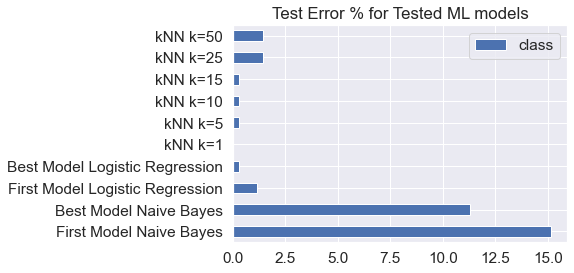

In [37]:
errorsNB_LR = [errorNaiveBayesFirst,errorNaiveBayesBest,errorLogRegFirst,errorLogRegBest]

errorRates = errorsNB_LR+errorKNN  
result = map(lambda x: 100*x, errorRates)
errorPercents=list(result)

errorPercents=pd.DataFrame(errorPercents,index=['First Model Naive Bayes','Best Model Naive Bayes','First Model Logistic Regression','Best Model Logistic Regression','kNN k=1','kNN k=5','kNN k=10','kNN k=15','kNN k=25','kNN k=50'])

errorPercents.plot(kind='barh',title='Test Error % for Tested ML models')


## 3- Conclusion
#### 1- We see through all the test error % bar plot, kNN with K<5 is the best model for our dataset, followed closely by Logistic regression. NaiveBayes performed poorly relative to the other two models even after implementing improvements.
#### 2- Feature ranking and ommission helped in increasing the accuracy of all models, as it showed through all the metrics implemented that 'entropy' either did not impact or negatively impacted the model prediction accuracy.
#### 3- Descriptive statistics helped see the outliers through the box plot, and the validity of assumptions of normal distributions through the histogram for the correlation of variables through the correlation matrix. Finally, the pairplot separated based by class helped visualize how the models would perform, especially the pairplot that showed the best two predictor variables. These were all very important in determining the best model.
#### 4- Cross-validation helped raise confidence in the model, as it showed that the train-test split was not skewing the test and train accuracies in either direction. 
#### 5- The bias-variance tradeoff is a key concept to target, where we see that introducing too high a reguralization penalty for Log Reg or raising the K value too high can lead to higher bias, which reduces the accuracy of the model. 
## Limitations
#### 1- This dataset has 1371 observations and only four predictor variables, therefore the room to perform multiple optimization and feature engineering techniques was limited.
#### 2- This dataset had no predictor categorical variables or discrete variables, which are often present in real life datasets.
#### 3- This dataset had no NaN values, which are often present in real life datasets and using good imputation techniques are essential to building robust models, so exposure to NaN values would have been helpful

## References


#### The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)
